In [64]:
import os
import numpy as np
import matplotlib.pyplot as plt
from loader import load_files
from matplotlib.pyplot import figure
from tie import FFTSolver2D
from finite_difference import central_finite_difference

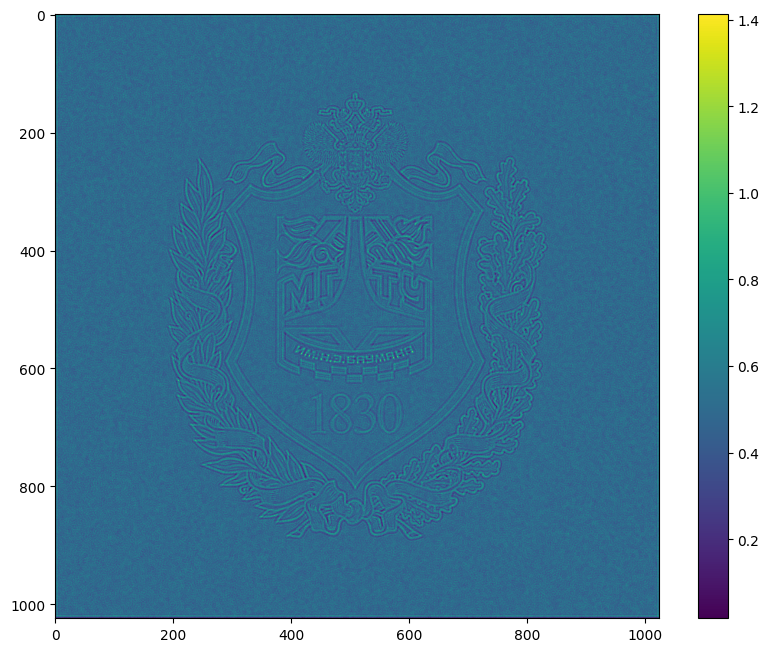

In [108]:
dz = 0.0008 # 1 mkm
i1_path = f'../propagation/propagated_fields/bmstu_phase_big_noise_intensity/z={dz*1000:.4f}.npy'
i2_path = f'../propagation/propagated_fields/bmstu_phase_big_noise_intensity/z=-{dz*1000:.4f}.npy'
intensities = [np.abs(field) ** 2 for field in load_files([i1_path, i2_path])]

figure(figsize=(10, 8), dpi=100)
plt.imshow(intensities[1])
plt.colorbar()
plt.show()

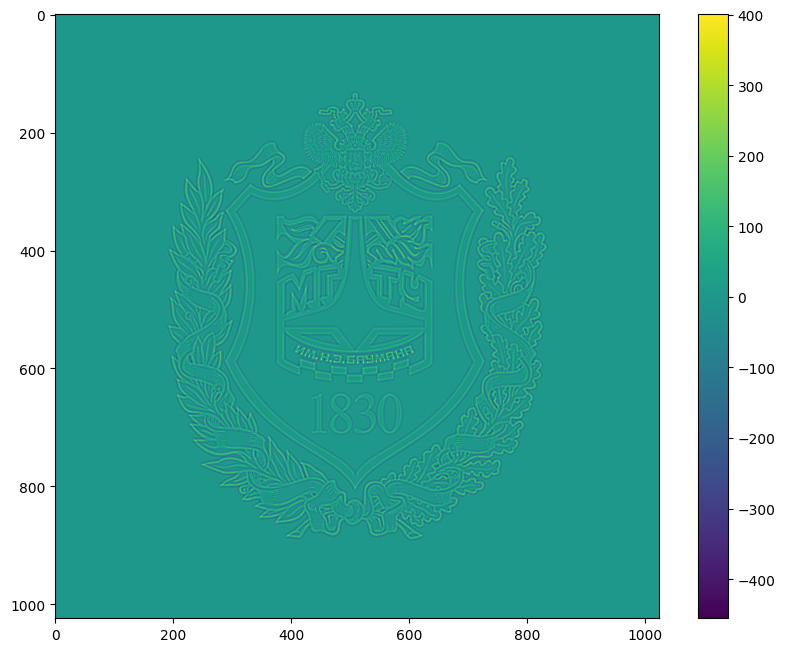

In [109]:
dz = dz * 2 # 2 mkm
axial_derivative = central_finite_difference(intensities, dz)
figure(figsize=(10, 8), dpi=100)
plt.imshow(axial_derivative)
plt.colorbar()
plt.show()

np.save(f'axial_derivative/bmstu_phase_big_noise_intensity/BMSTU_phase_big_noise_intensity_ad_dz={dz*1000:.4f}mm.npy', axial_derivative)

In [110]:
dz = 2 * dz
dz = - dz
px_size = 0.000005  # 5 mkm
wavelength = 0.000000555  # 555 nm
threshold = 0.1

solver = FFTSolver2D(intensities, dz, wavelength, px_size)
retrieved_phase = solver.solve(threshold)
filename = f'BMSTU_phase_dz={dz*1000:.4f}mm.npy'
save_folder = 'retrieved_phases/bmstu_phase_big_noise_intensity'
save_path = os.path.join(save_folder, filename)
np.save(save_path, retrieved_phase)

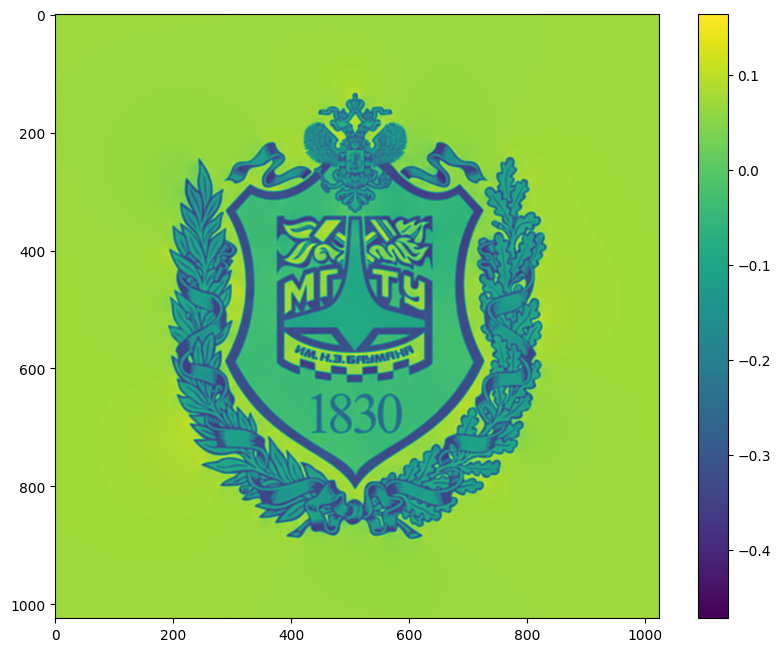

In [111]:
figure(figsize=(10, 8), dpi=100)
plt.imshow(np.load(f'{save_folder}/{filename}'))
plt.colorbar()
plt.show()